1. Questions and problem definition
2. Load and understand data
3. data clean ( correcting, completing, creating, and converting)
4. eda
5. feature engineering
6. model

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import random as rand

import matplotlib.pyplot as plt

import sklearn
import plotly.offline as pyo
import plotly.graph_objs as go
import colorlover as cl

pyo.init_notebook_mode(connected=True)

In [2]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

titanic_df = pd.concat([train_df, test_df])

/home/leon/miniconda3/envs/base_datasci/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [52]:
print(titanic_df.shape)
print(titanic_df.dtypes)
print(titanic_df.isna().sum())
    

(1309, 12)
Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object
Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64


In [12]:
# convert values
print(len(titanic_df["Sex"].unique()) == 2)
def clean_df(df):
    
    df = df.drop(columns=["Cabin"], axis=1)
    df = df.dropna()
    df["Sex"] = df["Sex"].apply(lambda x: 1 if x == "male" else 0)     
    df["Survived"] = df["Survived"].astype(int)
    return df

    
clean_df(titanic_df)


True


,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450
6,54.0,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,1,0,0,17463
7,2.0,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,1,3,0,349909
8,27.0,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,0,0,1,347742
9,14.0,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,0,1,1,237736
10,4.0,S,16.7000,"Sandstrom, Miss. Marguerite Rut",1,11,3,0,1,1,PP 9549


In [43]:
titanic.head()

,index,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


# Features

* PassengderId - unique id for each passenger
* Survived - class label
* Pclass - passenger class
* Name - name of passenger
* Sex - gender
* Age - year old
* Sibsp - total number of siblings and spouses
* Parch - # parents or children aboard
* Ticket - ticket number
* Fare - ticket price
* Cabin - room number
* Embarked - port

In [45]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

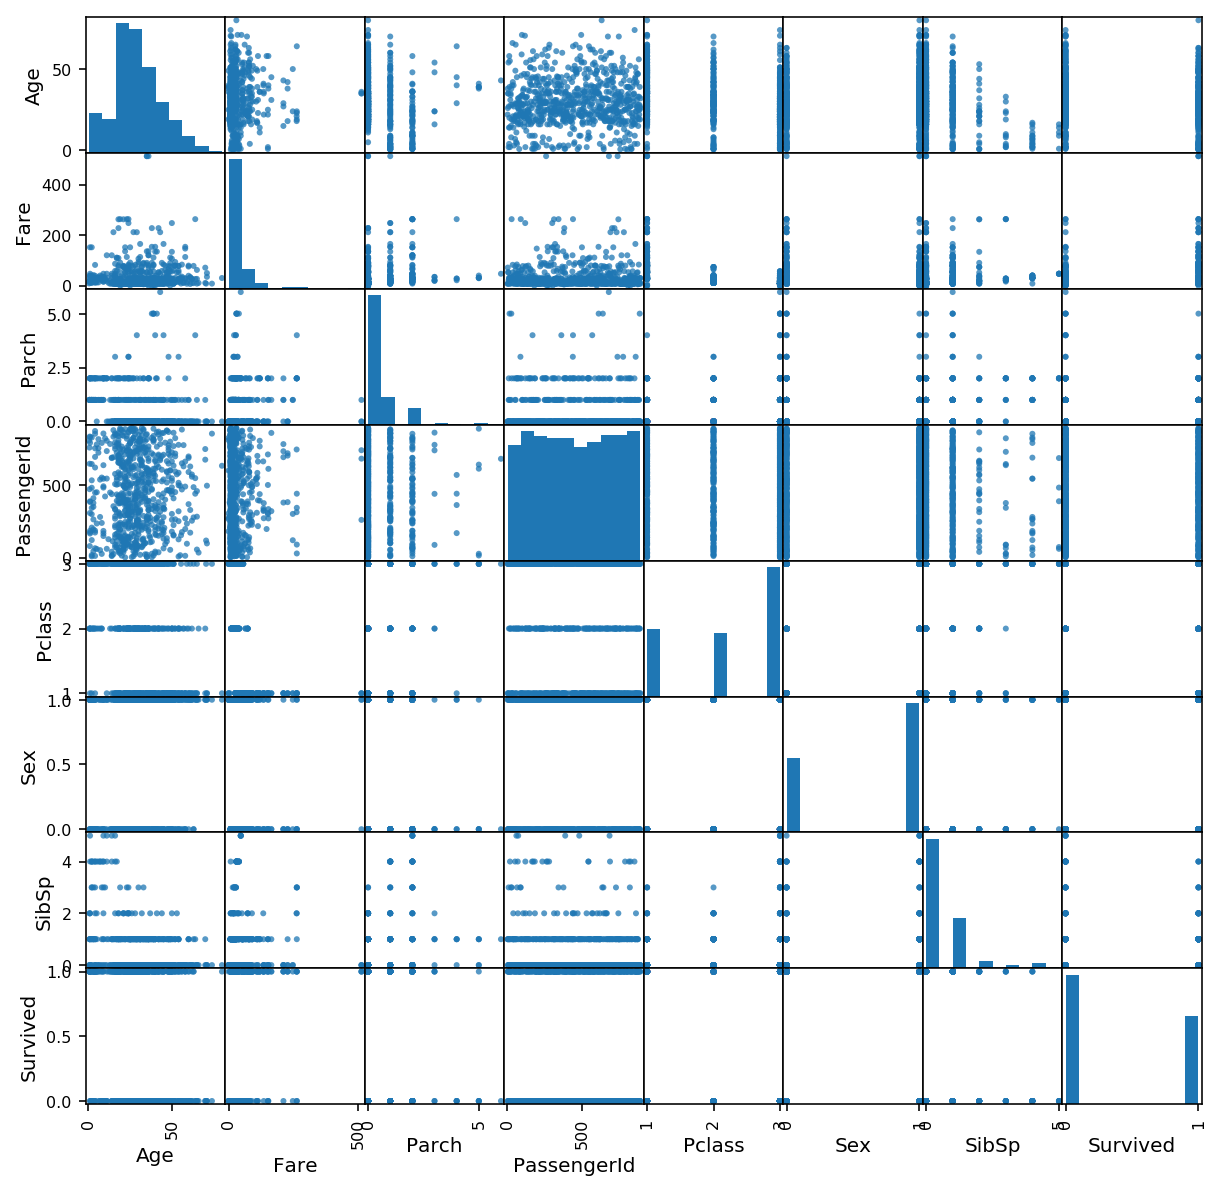

In [56]:
color_vals = []
pl_colorscale = cl.scales['3']['div']["RdYlBu"]

def plot_scatter(df):
    data = [go.Splom(
        dimensions=[dict(label=col, values=df[col]) for col in df.columns.values],
#         text=str(df["Survived"]),
        marker=dict(color=df["Survived"],
                    size=7,
                    colorscale="RdBu",
                    showscale=False,
                    line=dict(width=0.5, color='rgb(230,230,230)')),
        opacity=0.75
    )]
    axis = dict(showline=True,
               zeroline=False,
               girdcolor="#fff",
               ticklen=4)
    layout = go.Layout(
#         width=600,
#         height=800,
#         autosize=False,
        plot_bgcolor='rgba(240,240,240, 0.95)'  
    )
    fig = go.Figure(data=data, layout=layout)
    pyo.iplot(fig)

# plot_scatter(clean_df(titanic_df))
pd.plotting.scatter_matrix(clean_df(titanic_df), alpha=0.75, figsize=(10,10))
plt.show()

In [59]:

def eda_analysis(df):
    age_hist_data = [go.Histogram(
        x=df[(df.Survived==alive)]["Age"],
        opacity=0.75,
        name= "Survived" if alive == 0 else "Died",
    ) for alive in [0, 1]]
    age_hist_layout = go.Layout(
        xaxis=dict(title="Age"),
        barmode="overlay"
    )
    age_hist_fig = go.Figure(data=age_hist_data, layout=age_hist_layout)
    pyo.iplot(age_hist_fig)
    
    embark_df = df.pivot_table(index="Embarked", columns="Survived", values="Age", aggfunc="count")
    embark_heat_data = [go.Heatmap(
        z=embark_df.values,
        x=["Died", "Survived"],
        y=embark_df.index.values
        
    )]
    embark_heat_layout = go.Layout(
        yaxis=dict(title="Embarked")
    )
    embark_heat_fig = go.Figure(data=embark_heat_data, layout=embark_heat_layout)
    pyo.iplot(embark_heat_fig)
    
    fare_hist_data = [go.Histogram(
        x=df[(df.Survived==alive)]["Fare"],
        opacity=0.75,
        name= "Survived" if alive == 0 else "Died"
    ) for alive in [0, 1]]
    fare_hist_layout = go.Layout(
        xaxis=dict(title="Fare"),
        barmode="overlay"
    )
    fare_hist_fig = go.Figure(data=fare_hist_data, layout=fare_hist_layout)
    pyo.iplot(fare_hist_fig)
    
    parch_bar_data = [go.Bar(
        x=df
    )]
    
  
eda_analysis(clean_df(titanic_df))